In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import plotly.offline as py
color = sns.color_palette()
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
import os
# os.listdir("../input")
from sklearn.metrics import confusion_matrix, classification_report

Populating the interactive namespace from numpy and matplotlib


#Data Loading


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GrammarandProductReviews.csv')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


#Exploratory Data Analysis and Data Preprocessing

In [ ]:
print ('Rows     : ', df.shape[0])
print ('Columns  : ', df.shape[1])
print ('\nFeatures : ', df.columns.tolist())
print ('\nMissing values :  ', df.isnull().sum().values.sum())
print ('\nUnique values :  \n', df.nunique())

Rows     :  71044
Columns  :  25

Features :  ['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys', 'manufacturer', 'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc']

Missing values :   296152

Unique values :  
 id                        600
brand                     392
categories                581
dateAdded                 598
dateUpdated               354
ean                       473
keys                      600
manufacturer              463
manufacturerNumber        583
name                      600
reviews.date            13789
reviews.dateAdded        3199
reviews.dateSeen        17469
reviews.didPurchase         2
reviews.doRecommend         2
reviews.id              31374
reviews.numHelpful       

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64

In [ ]:
# drop the rows having null values for reviews text
df = df.dropna(subset=['reviews.text'])

In [ ]:
# there are many duplicate reviews
df['reviews.text'].value_counts()[10:50]

Taste great                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
Yummy                                                                                                                                                                                                                                                                                                      

#Data Visualization

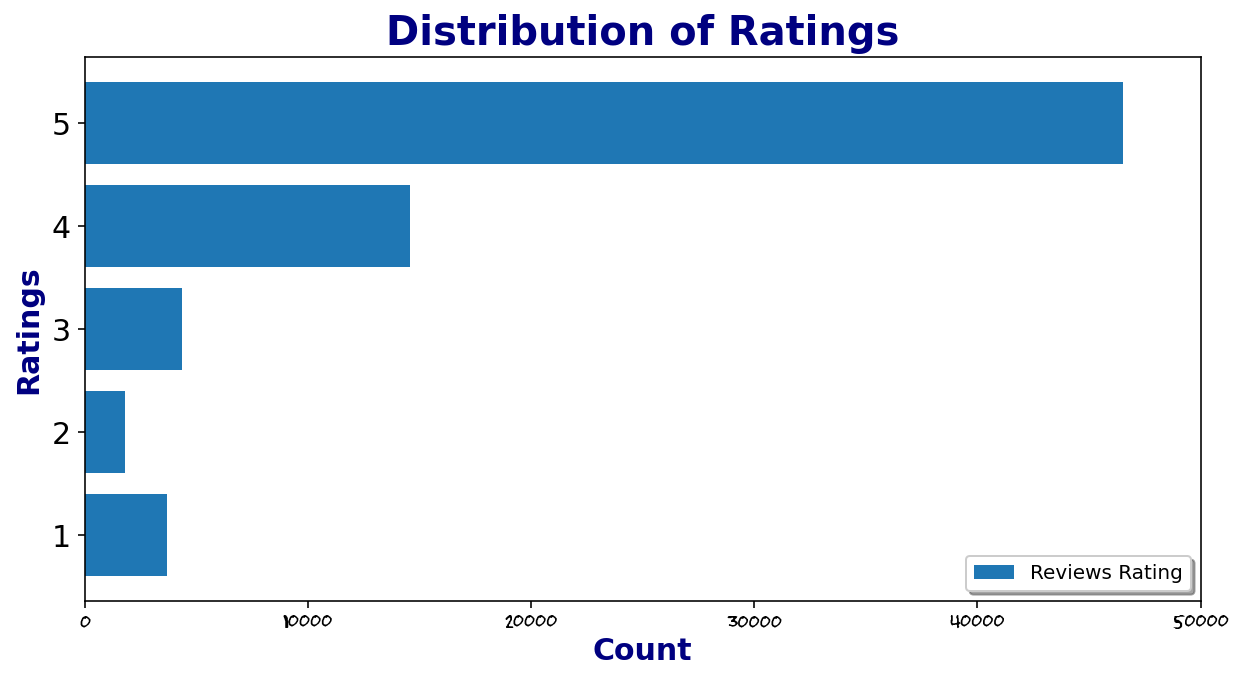

In [ ]:
# Plot ratings frequency
plt.figure(figsize = [10,5])   # [width, height]

x = list( df['reviews.rating'].value_counts().index )
y = list( df['reviews.rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 50000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviews Rating'], shadow=True, loc=4)
# loc=1 topright, loc=2 topleft, loc=3 bottomleft, loc=4 bottom right, loc=9 topmiddle

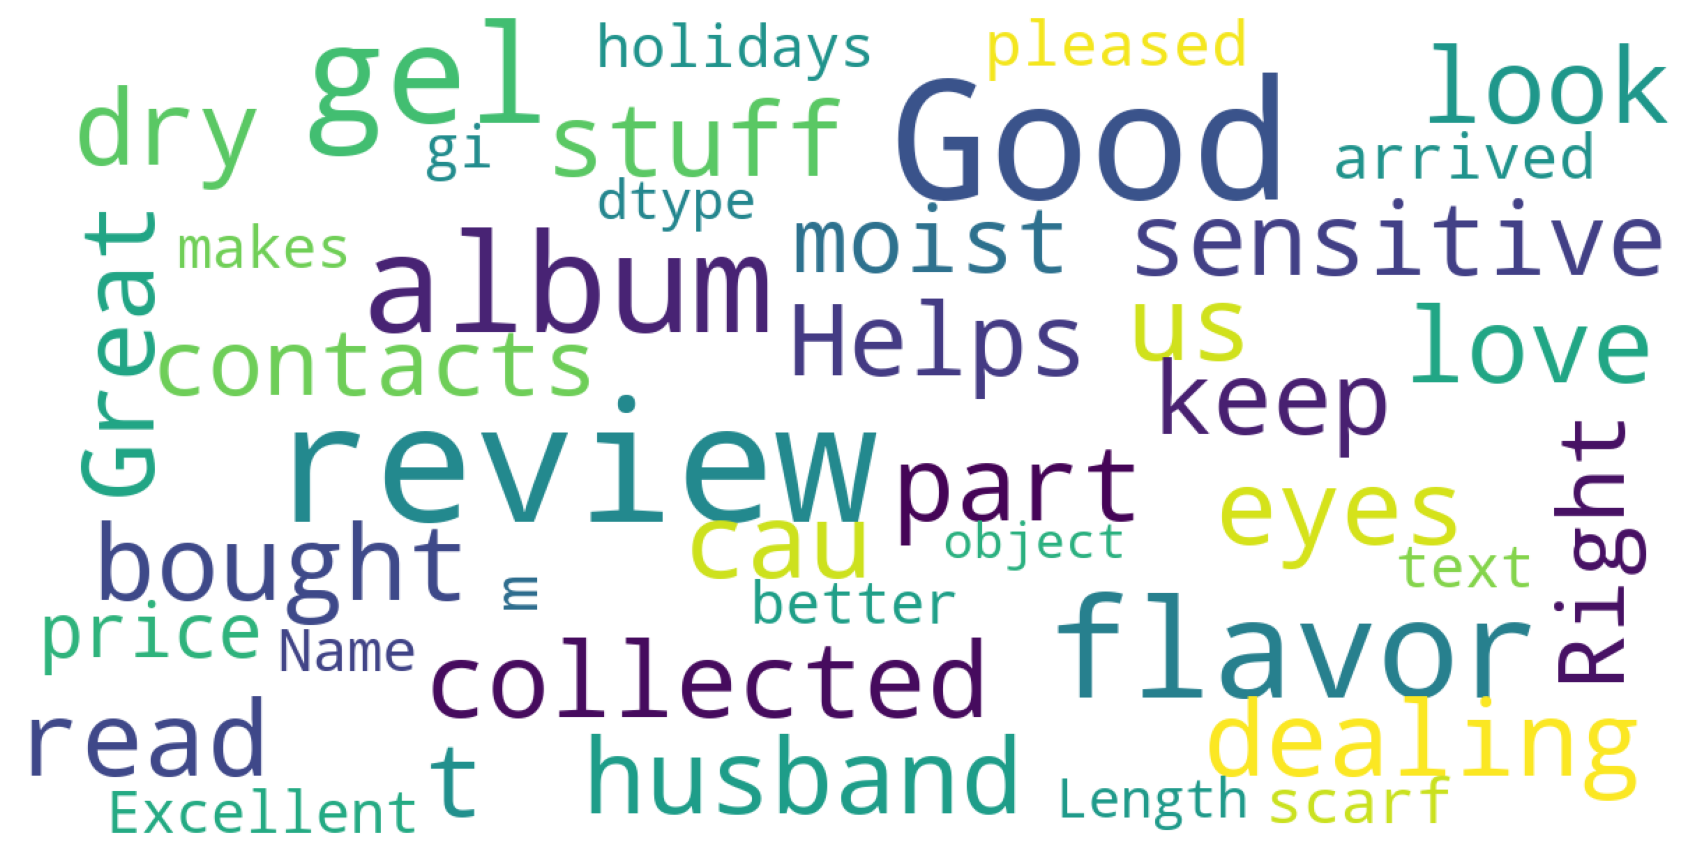

In [ ]:
#Word frequency chart (Word Cloud)
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=600,
        max_font_size=40,
        scale=3,
        random_state=1    ).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['reviews.text'])

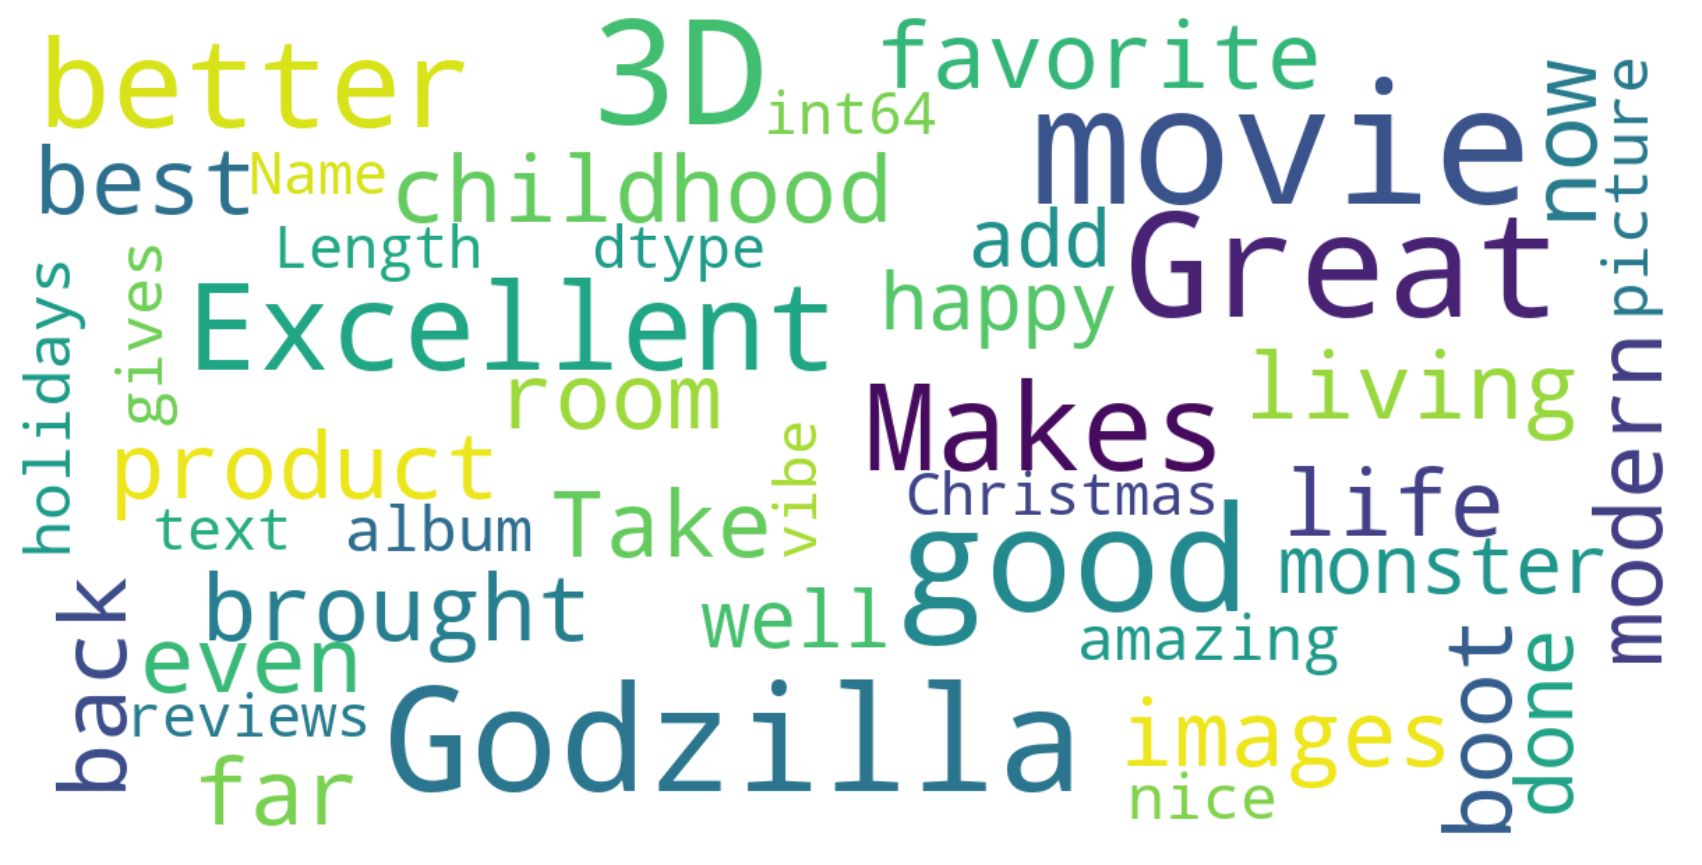

In [ ]:
# alternate code
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=600, max_font_size=40, scale=3,
        random_state=1).generate(str(df['reviews.text'].value_counts()))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

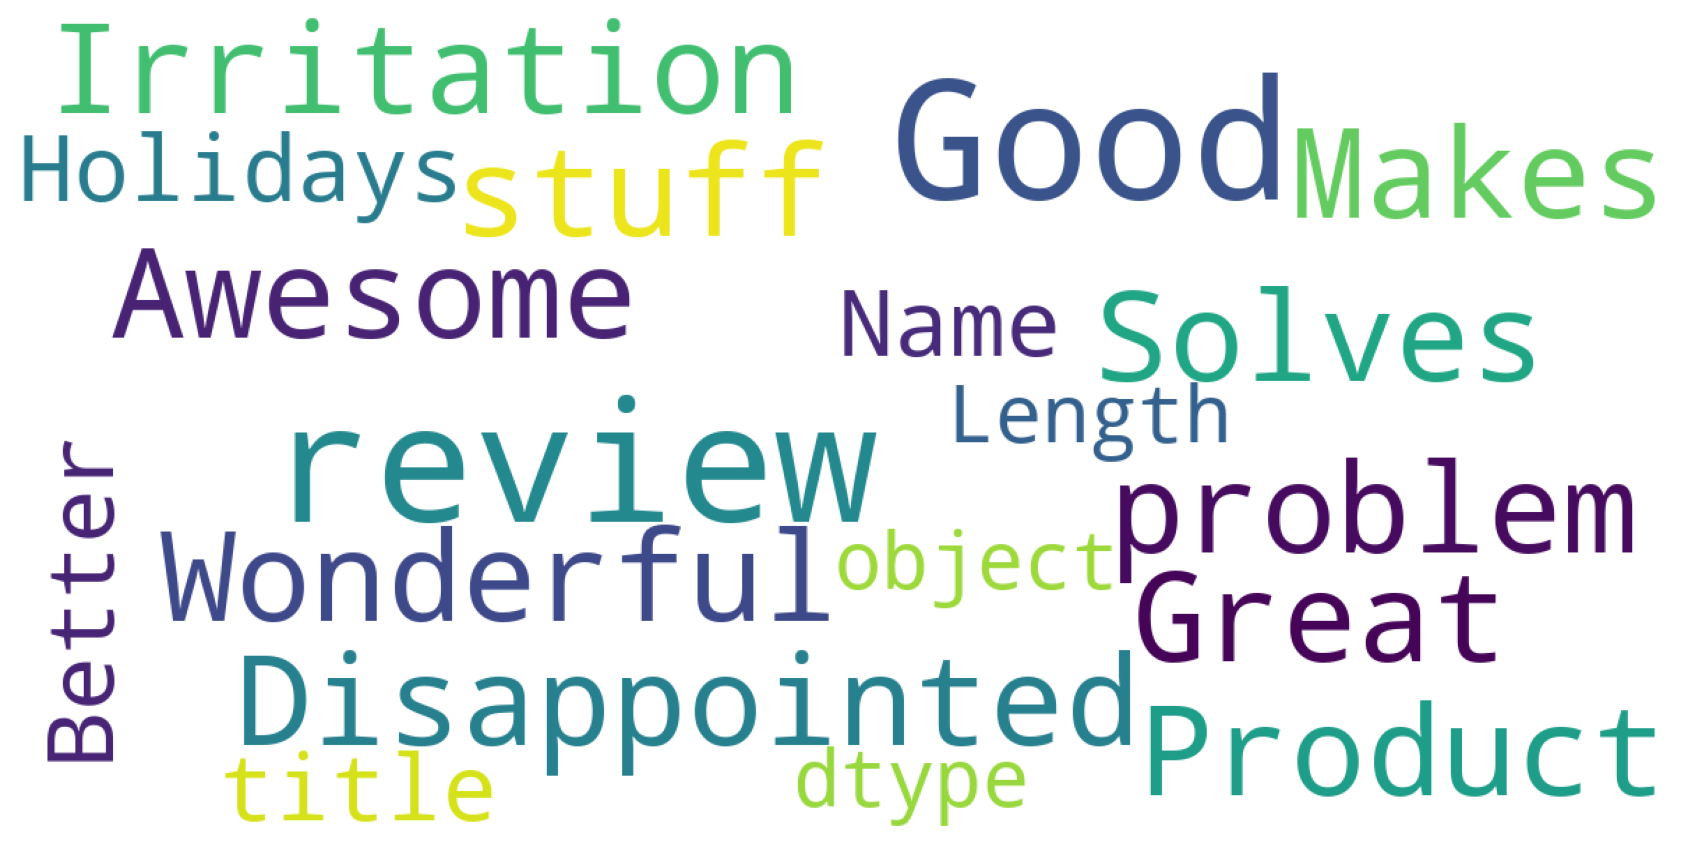

In [ ]:
show_wordcloud(df['reviews.title'])
# Great = 10938, great = 3133
# Disappointed = 156, disappointed = 75, Disappointing = 50, disappointing = 25, dissapoitned = 1

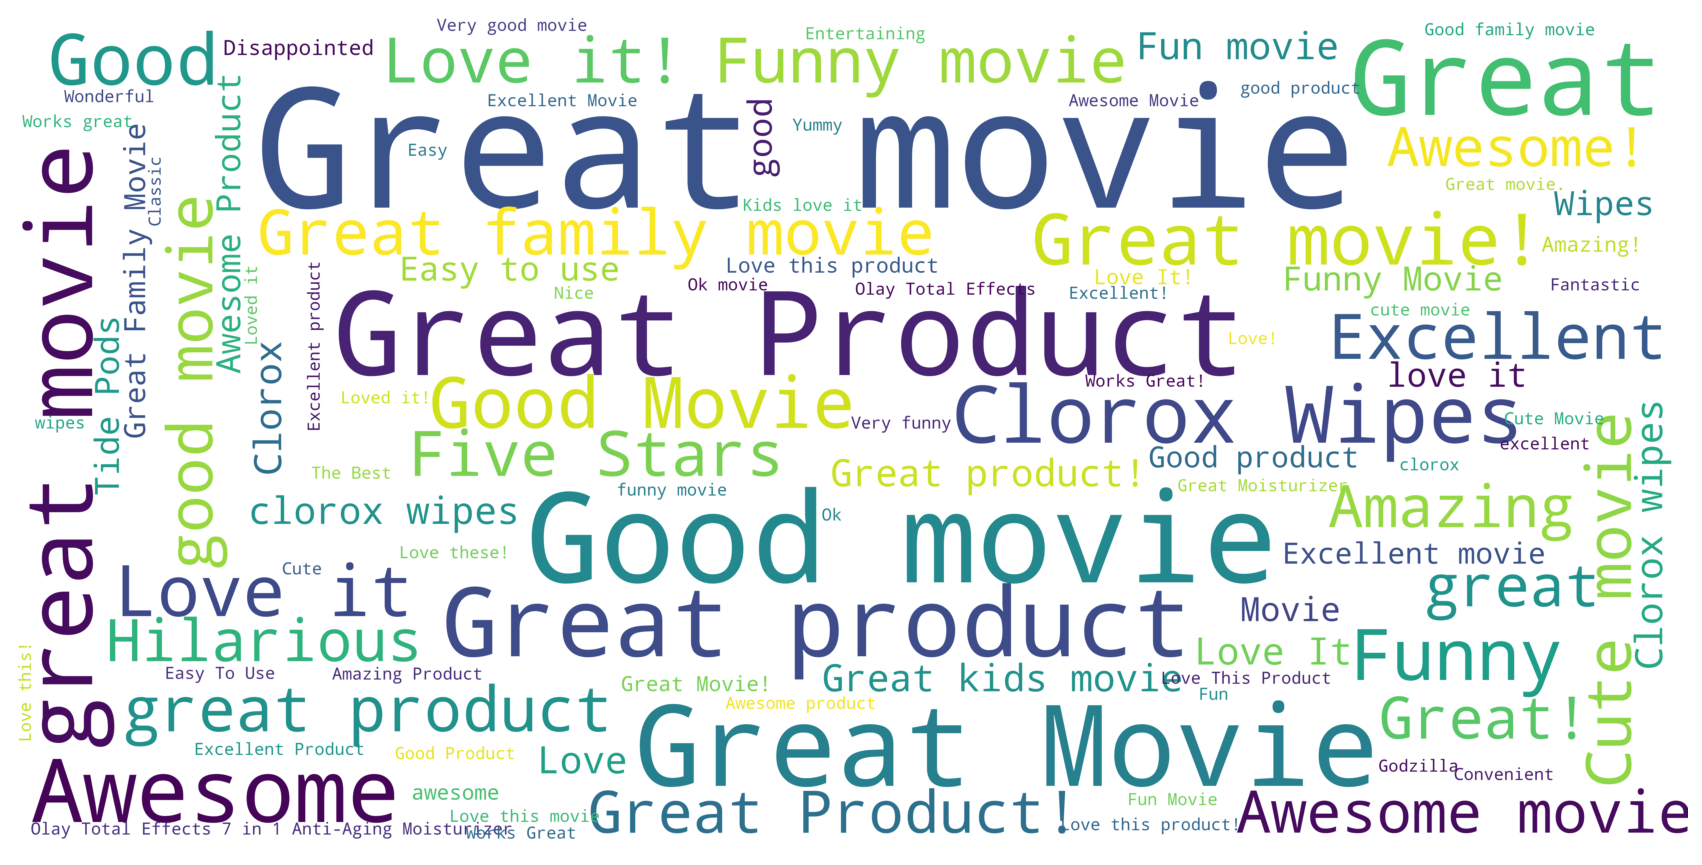

In [ ]:
# another code
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=400, max_font_size=40, scale=30,
        random_state=1).generate_from_frequencies((df['reviews.title'].value_counts()  ))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

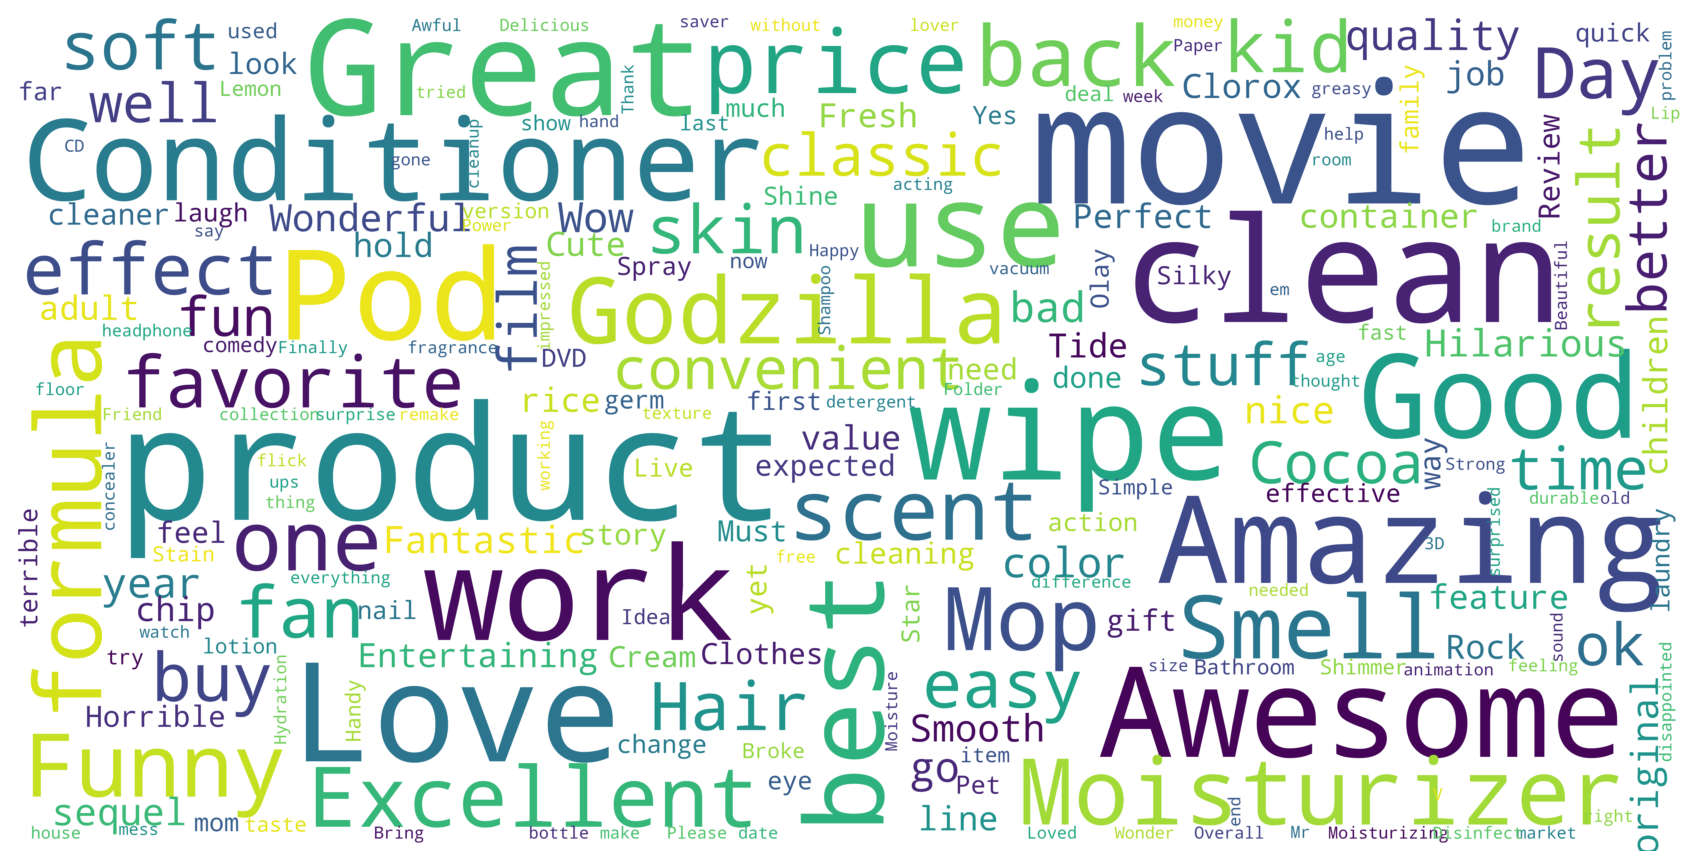

In [ ]:
#tokenize to individual word (uni-gram) - reviews.title
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.title'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [ ]:
len(big_list)

232473

In [ ]:
#tokenize to individual word (uni-gram) - reviews.text
split_title = []
listCounts = []
split_title = [x.split(" ") for x in df['reviews.text'].astype(str)]
big_list = []
for x in split_title:
    big_list.extend(x)

listCounts = pd.Series(big_list).value_counts()

wordcloud = WordCloud(background_color='white', max_words=400, max_font_size=40, scale=30,
        random_state=1).generate((listCounts[listCounts > 2]).to_string())
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
len(big_list)

In [ ]:
# what are the popular categories
df['categories'].value_counts()

In [ ]:
#which are the popular products reviewed
df['name'].value_counts()

#Finding out if the product reviewer actually bought the product or not

In [ ]:
#replacing 38,886 null fields with "Null" under the "reviews.didPurchase" feature
df['reviews.didPurchase'].fillna('Null', inplace=True)

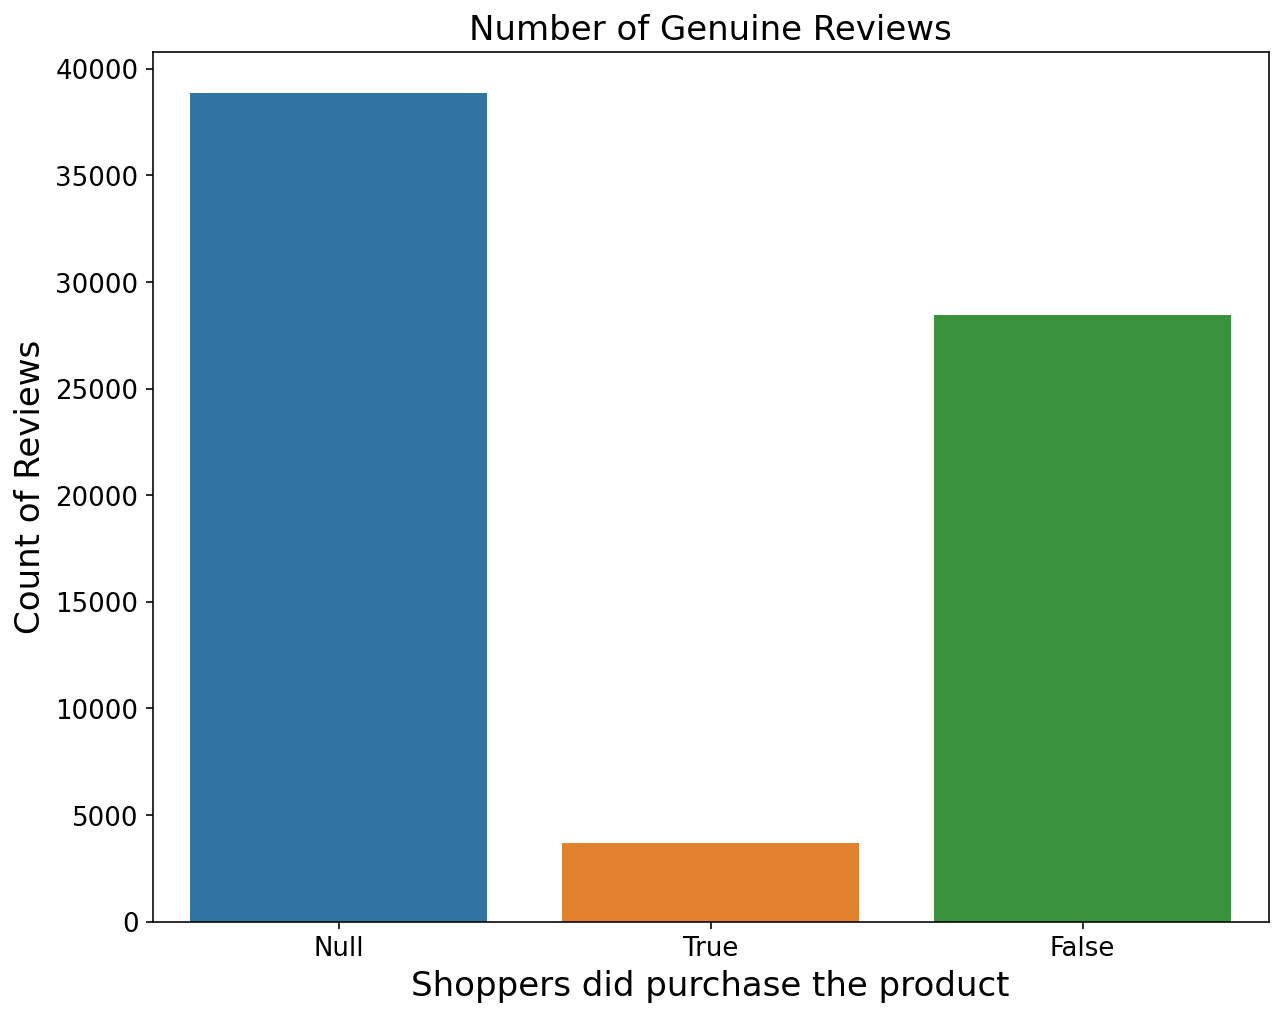

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.countplot(df['reviews.didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

In [ ]:
df['reviews.didPurchase'].value_counts()

Null     38852
False    28474
True      3682
Name: reviews.didPurchase, dtype: int64

In [ ]:
# non buyers of product who provided the review
3681/70008

0.05257970517655125

##Correlation Map

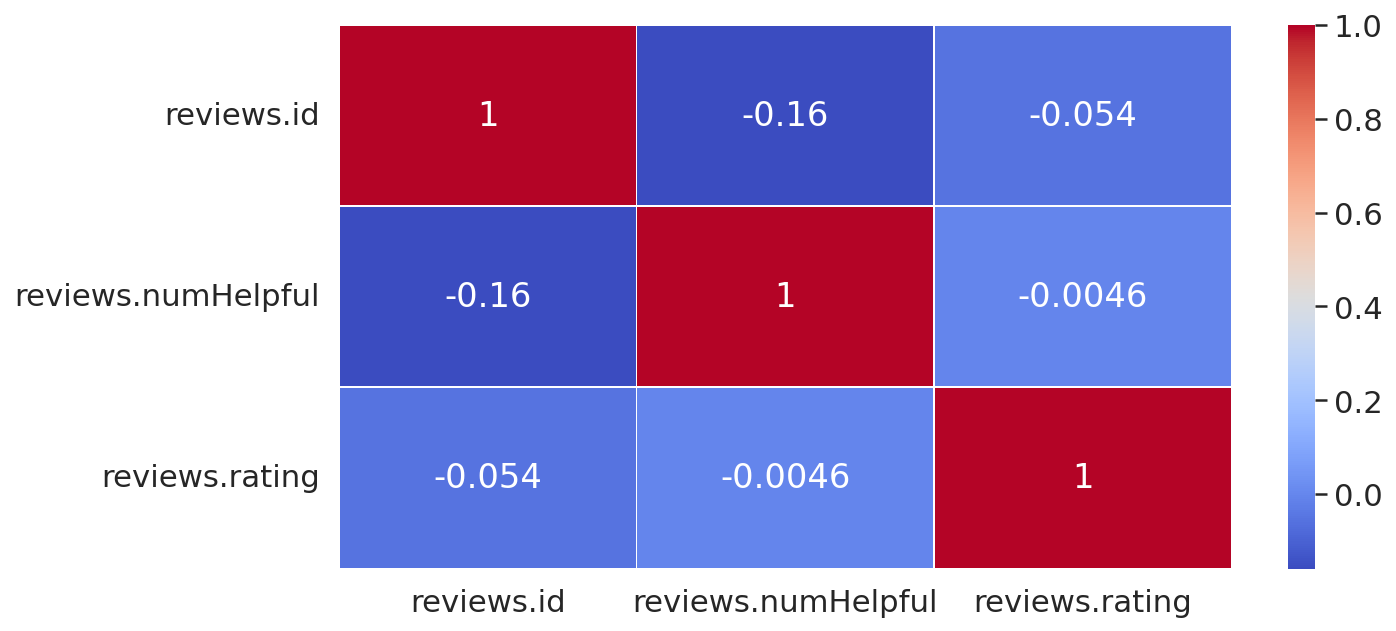

In [ ]:
# does not give us a lot of infomation
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

#Which is the most popular product purchased?

In [ ]:
# "The Foodsaver174 10 Cup Fresh Container - Fac10-000" is purchased almost 500 times
df1 = df[df['reviews.didPurchase'] == True]
df1['name'].value_counts()

The Foodsaver174 10 Cup Fresh Container - Fac10-000                      477
Pantene Airspray Hairspray - 7 Oz                                        443
Hormel Chili, No Beans                                                    91
Coty Airspun Face Powder, Translucent Extra Coverage                      88
Just For Men Brush-In Color Gel For Mustache & Beard, Dark Brown M-45     80
                                                                        ... 
Kenroy Home Table Lamp - Teal                                              1
Tai Pei Sweet & Sour Chicken                                               1
Lucy's Sugar Cookies, 5.5oz                                                1
Black Radiance Artisan Color Baked Blush, Warm Berry                       1
If A Man Answers (dvd)                                                     1
Name: name, Length: 304, dtype: int64

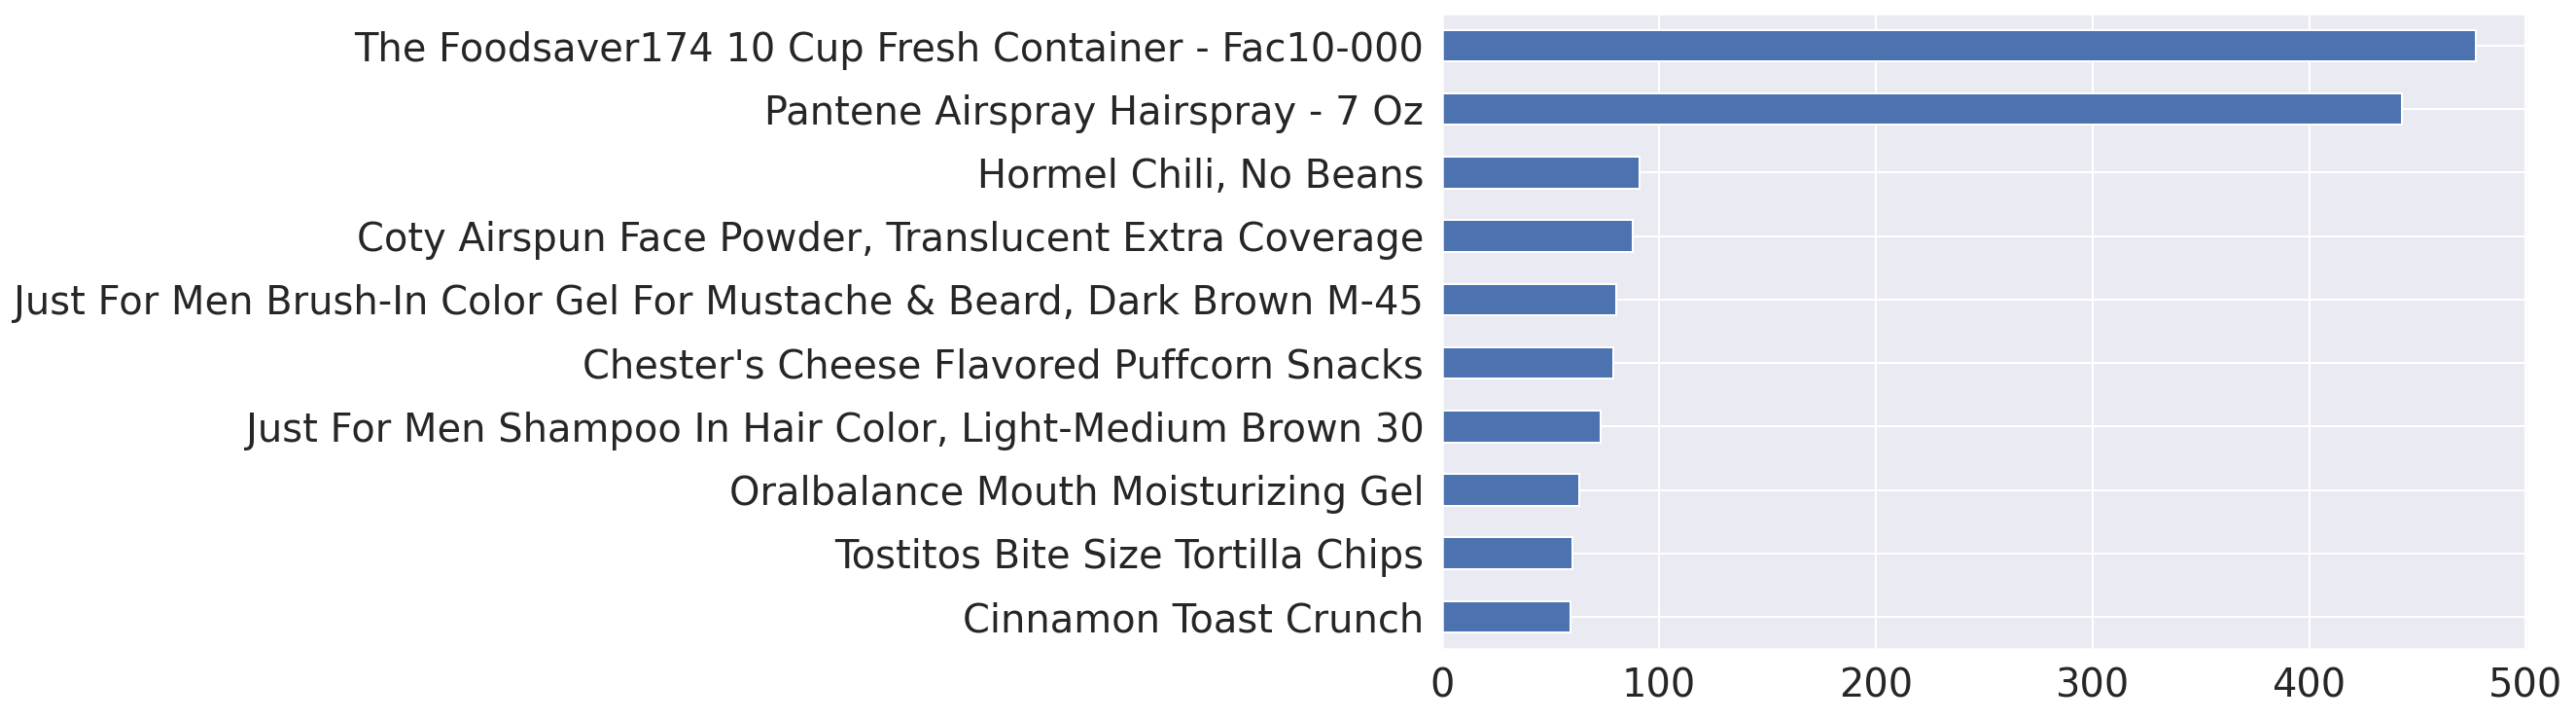

In [ ]:
df1['name'].value_counts()[0:10].plot(kind = 'barh', figsize=[10,6], fontsize=20).invert_yaxis()

#Prediction of Ratings

In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=df['reviews.text']
y=df['reviews.rating']

In [ ]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 3) )  # trying 1,3
#     max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(all_text)

In [ ]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(all_text)

training_features = hstack([train_char_features, train_word_features])

In [ ]:
import time   # time1 = time.time(); time2 = time.time(); time_taken = time2 - time1
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 71

X_train, X_test, y_train, y_test = train_test_split(training_features, y, test_size=0.3, random_state=seed)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (49705, 1346053)
y_train (49705,)
X_test (21303, 1346053)
y_test (21303,)


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
time1 = time.time()

classifier = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=seed, n_jobs=-1)
classifier.fit(X_train,y_train)
preds1 = classifier.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 888.40 seconds


In [ ]:
print("Random Forest Model accuracy", accuracy_score(preds1, y_test))
print(classification_report(preds1, y_test))
print(confusion_matrix(preds1, y_test))

Random Forest Model accuracy 0.7160963244613435
              precision    recall  f1-score   support

           1       0.42      0.90      0.57       522
           2       0.18      0.99      0.31       101
           3       0.11      0.94      0.20       157
           4       0.15      0.73      0.24       860
           5       0.99      0.71      0.83     19663

    accuracy                           0.72     21303
   macro avg       0.37      0.85      0.43     21303
weighted avg       0.94      0.72      0.79     21303

[[  470    30    14     5     3]
 [    1   100     0     0     0]
 [    1     2   147     6     1]
 [    7    21   131   626    75]
 [  653   397  1021  3680 13912]]


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
time1 = time.time()

logit = LogisticRegression(C=1, multi_class='ovr')
logit.fit(X_train,y_train)
preds3 = logit.predict(X_test)

time_taken = time.time() - time1
print('Time Taken: {:.2f} seconds'.format(time_taken))

Time Taken: 205.24 seconds


In [ ]:
print("Logistic Regression accuracy", accuracy_score(preds3, y_test))
print(classification_report(preds3, y_test))
print(confusion_matrix(preds3, y_test))

Logistic Regression accuracy 0.7327137022954513
              precision    recall  f1-score   support

           1       0.65      0.76      0.70       972
           2       0.08      0.75      0.14        56
           3       0.18      0.54      0.27       444
           4       0.26      0.51      0.34      2211
           5       0.96      0.76      0.85     17620

    accuracy                           0.73     21303
   macro avg       0.43      0.66      0.46     21303
weighted avg       0.86      0.73      0.78     21303

[[  734   126    59    30    23]
 [    8    42     4     1     1]
 [   32    61   240    86    25]
 [   47   112   457  1123   472]
 [  311   209   553  3077 13470]]


#Support Vector Machine
### (Large run time)

In [ ]:
#importing the needed classes
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#create two different classifiers; one with Polynomial kernel, and another one with RBF kernel
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [ ]:
#test the two classifiers using the test data set
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))